## Download Historical Data About Various Coins

In [1]:
import yfinance as yf

yf_data = yf.download(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD','XRP-USD','DOT-USD','MATIC-USD','SOL-USD'],
                      start='2016-01-01')
yf_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[*********************100%***********************]  8 of 8 completed


Price      Adj Close                                                   \
Ticker       ADA-USD     BNB-USD       BTC-USD   DOT-USD      ETH-USD   
Date                                                                    
2016-01-01       NaN         NaN    434.334015       NaN          NaN   
2016-01-02       NaN         NaN    433.437988       NaN          NaN   
2016-01-03       NaN         NaN    430.010986       NaN          NaN   
2016-01-04       NaN         NaN    433.091003       NaN          NaN   
2016-01-05       NaN         NaN    431.959991       NaN          NaN   
...              ...         ...           ...       ...          ...   
2025-01-08  0.948031  695.837158  95043.523438  6.761236  3326.329346   
2025-01-09  0.905990  685.120728  92484.039062  6.557372  3219.430664   
2025-01-10  0.931453  693.624451  94701.453125  6.736067  3267.489990   
2025-01-11  0.994524  696.657837  94566.593750  6.736469  3282.217773   
2025-01-12  0.989752  691.856628  93937.382812  6.645839  3239.892822   

Price                                          Close              ...  \
Ticker     MATIC-USD     SOL-USD   XRP-USD   ADA-USD     BNB-USD  ...   
Date                                                              ...   
2016-01-01       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-02       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-03       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-04       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-05       NaN         NaN       NaN       NaN         NaN  ...   
...              ...         ...       ...       ...         ...  ...   
2025-01-08  0.462149  197.559052  2.375305  0.948031  695.837158  ...   
2025-01-09  0.449210  185.025284  2.275212  0.905990  685.120728  ...   
2025-01-10  0.457898  187.579178  2.343252  0.931453  693.624451  ...   
2025-01-11  0.459861  187.995514  2.576770  0.994524  696.657837  ...   
2025-01-12  0.452318  185.836761  2.493600  0.989752  691.856628  ...   

Price             Open                  Volume                             \
Ticker         SOL-USD   XRP-USD       ADA-USD       BNB-USD      BTC-USD   
Date                                                                        
2016-01-01         NaN       NaN           NaN           NaN     36278900   
2016-01-02         NaN       NaN           NaN           NaN     30096600   
2016-01-03         NaN       NaN           NaN           NaN     39633800   
2016-01-04         NaN       NaN           NaN           NaN     38477500   
2016-01-05         NaN       NaN           NaN           NaN     34522600   
...                ...       ...           ...           ...          ...   
2025-01-08  202.227875  2.272360  1.978553e+09  2.189465e+09  63875859171   
2025-01-09  197.559052  2.375308  1.351716e+09  1.931493e+09  62777261693   
2025-01-10  185.013138  2.275167  1.252359e+09  1.680784e+09  62058693684   
2025-01-11  187.571182  2.343246  8.888774e+08  1.290072e+09  18860894100   
2025-01-12  187.997101  2.576416  1.336498e+09  1.282745e+09  17957797888   

Price                                                                          
Ticker          DOT-USD       ETH-USD   MATIC-USD       SOL-USD       XRP-USD  
Date                                                                           
2016-01-01          NaN           NaN         NaN           NaN           NaN  
2016-01-02          NaN           NaN         NaN           NaN           NaN  
2016-01-03          NaN           NaN         NaN           NaN           NaN  
2016-01-04          NaN           NaN         NaN           NaN           NaN  
2016-01-05          NaN           NaN         NaN           NaN           NaN  
...                 ...           ...         ...           ...           ...  
2025-01-08  488975074.0  3.433773e+10   6320648.0  5.028292e+09  8.537148e+09  
2025-01-09  333718501.0  2.881573e+10  10685447.0  3.815664e+09  6.033281e+

In [2]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT','SOLUSDT']

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in univ:
        px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
        print(f"Downloaded data for {coin}.")
    
    return px_data

In [3]:
px_data = get_price_data_for_universe('4h', '2020-01-01')
px_data['BTCUSDT']

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.
Downloaded data for SOLUSDT.


,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
open_time,,,,,,,,,,,
2020-01-01 00:00:00,7180.46000000,7238.03000000,7175.62000000,7230.71000000,12.76044500,2020-01-01 03:59:59.999,92038.71492464,136,6.77459900,48856.54532507,0
2020-01-01 04:00:00,7226.19000000,7231.70000000,7196.20000000,7205.50000000,1.11132000,2020-01-01 07:59:59.999,8019.12142380,64,0.51825300,3740.42331552,0
2020-01-01 08:00:00,7209.50000000,7231.17000000,7181.17000000,7195.80000000,2.09735800,2020-01-01 11:59:59.999,15104.19833234,61,1.10531000,7957.89489576,0
2020-01-01 12:00:00,7193.32000000,7244.43000000,7193.32000000,7233.02000000,7.53150600,2020-01-01 15:59:59.999,54379.11998954,111,4.23535400,30569.13569131,0
2020-01-01 16:00:00,7237.54000000,7245.54000000,7215.51000000,7223.72000000,5.49440100,2020-01-01 19:59:59.999,39733.51835241,80,2.65822100,19232.35402975,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,94490.64000000,94646.13000000,94052.35000000,94154.90000000,0.76514000,2025-01-11 19:59:59.999,72136.03844910,185,0.29300000,27632.71509470,0
2025-01-11 20:00:00,94266.40000000,94965.04000000,94176.29000000,94537.11000000,0.71152000,2025-01-11 23:59:59.999,67402.85368040,282,0.55718000,52791.58360220,0
2025-01-12 00:00:00,94640.43000000,94715.79000000,94302.95000000,94567.89000000,0.62622000,2025-01-12 03:59:59.999,59166.66148160,222,0.24574000,23226.22907360,0


In [4]:
px = {}

for coin in px_data:
    px[coin] = px_data[coin]["close"]

px_df = pd.DataFrame(px).astype(float)
px_df = px_df.reindex(pd.date_range(px_df.index[0],px_df.index[-1],freq='4h'))
px_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,94154.90,3278.26,0.95360,695.2500,2.53000,6.638,NaN,187.63
2025-01-11 20:00:00,94537.11,3285.23,0.99440,698.7600,2.58250,6.744,NaN,188.10
2025-01-12 00:00:00,94567.89,3283.33,1.02110,691.9900,2.54120,6.761,NaN,187.21
2025-01-12 04:00:00,94292.23,3269.00,1.00330,694.5300,2.54260,6.721,NaN,186.68


In [5]:
volume_dict = dict()

for coin in px_data:
    volume_dict[coin] = px_data[coin]["volume"]

volume_df = pd.DataFrame(volume_dict).astype(float)
volume_df = volume_df.reindex(pd.date_range(volume_df.index[0], volume_df.index[-1], freq='4h'))
volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,12.760445,116.96768,102547.5,178.050,413589.5,NaN,NaN,NaN
2020-01-01 04:00:00,1.111320,30.72021,123837.9,142.290,20155.3,NaN,NaN,NaN
2020-01-01 08:00:00,2.097358,67.41356,16867.6,452.150,29685.1,NaN,NaN,NaN
2020-01-01 12:00:00,7.531506,104.17904,24119.6,146.060,2491.5,NaN,NaN,NaN
2020-01-01 16:00:00,5.494401,24.96585,25282.5,188.870,24935.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,0.765140,4.73240,53158.8,21.754,341469.0,34.96,NaN,247.494
2025-01-11 20:00:00,0.711520,10.00650,490476.9,26.505,615652.0,1202.74,NaN,1073.542
2025-01-12 00:00:00,0.626220,15.06190,388185.0,22.014,99776.0,33.18,NaN,283.105
2025-01-12 04:00:00,0.256950,2.61420,84621.1,11.190,30105.0,74.11,NaN,244.124


In [6]:
ret = px_df / px_df.shift() - 1
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.003030,0.003382,0.017173,0.005627,0.050839,0.000151,NaN,0.002565
2025-01-11 20:00:00,0.004059,0.002126,0.042785,0.005049,0.020751,0.015969,NaN,0.002505
2025-01-12 00:00:00,0.000326,-0.000578,0.026850,-0.009689,-0.015992,0.002521,NaN,-0.004732
2025-01-12 04:00:00,-0.002915,-0.004364,-0.017432,0.003671,0.000551,-0.005916,NaN,-0.002831


### Convenience Functions

In [7]:
# Calculate net returns when taking into account transaction costs. We assume transaction costs of 20 bps per
# share of turnover representing the sum of commissions to brokers and slippage paid to market makers. We
# ignore the fixed cost of the bid-ask spread also normally paid to market makers (assuming this is only about
# 1 bp in general).

def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias.
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

## Strategy 1: Testing Different Time Horizons For Momentum And Reversal -- All Coins

In [8]:
# Look at a rolling window of the immediately preceding average return for
# different granularities and trade based on the 
# ranked-demeaned-normalized values. Viewing this as a momentum strategy, 
# we long the coins in the top 50% and short the coins in the bottom 50%
# over the window. (All coins are included.)

In [9]:
def get_strat_1_holdings():
    strat_1_holdings = dict()

    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        period_mean_returns = ret.rolling(window=t, min_periods=1).mean()

        ranked_ret = period_mean_returns.rank(axis=1)
        ranked_demeaned_ret = ranked_ret.subtract(ranked_ret.mean(axis=1), axis=0)
        ranked_demeaned_normalized_ret = ranked_demeaned_ret.divide(ranked_demeaned_ret.abs().sum(axis=1), axis=0)
        
        # shift the holdings to use information from the previous days to avoid look-ahead bias
        strat_1_holdings[t] = ranked_demeaned_normalized_ret.shift()
    
    return strat_1_holdings

In [10]:
strat_1_holdings = get_strat_1_holdings()
strat_1_holdings[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,0.083333,0.000000,0.166667,-0.166667,0.250000,-0.250000,NaN,-0.083333
2025-01-11 20:00:00,-0.083333,0.000000,0.166667,0.083333,0.250000,-0.250000,NaN,-0.166667
2025-01-12 00:00:00,-0.250000,0.000000,0.166667,0.083333,0.250000,-0.166667,NaN,-0.083333
2025-01-12 04:00:00,-0.166667,0.000000,0.250000,-0.250000,0.166667,0.083333,NaN,-0.083333


In [11]:
def get_strat_1_gross_returns(strat_1_holdings, ret):
    strat_1_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_ret[t] = (strat_1_holdings[t] * ret).sum(axis=1)
    
    return pd.DataFrame(strat_1_ret)


strat_1_gross_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-2.970017,5.786092,5.522780,5.522780,5.352667,5.157555,4.864147,3.579313,3.246055
2025-01-11 20:00:00,3.231819,1.489649,3.142929,2.703320,2.869578,2.916859,3.044315,4.132771,0.930613
2025-01-12 00:00:00,1.884612,0.526493,-0.041014,0.803596,0.803596,-0.159730,0.624034,0.237570,0.116795
2025-01-12 04:00:00,-2.226710,-1.963802,-1.613423,-1.761987,-1.608320,-1.808629,-1.022347,-1.327190,-0.444149


In [12]:
def get_strat_1_net_returns(strat_1_holdings, ret):
    #get_net_return(strat_holdings, ret)
    strat_1_net_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_net_ret[t] = get_net_return(strat_1_holdings[t], ret)
    
    return pd.DataFrame(strat_1_net_ret)

strat_1_gross_daily_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_daily_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-2.970017,5.786092,5.522780,5.522780,5.352667,5.157555,4.864147,3.579313,3.246055
2025-01-11 20:00:00,3.231819,1.489649,3.142929,2.703320,2.869578,2.916859,3.044315,4.132771,0.930613
2025-01-12 00:00:00,1.884612,0.526493,-0.041014,0.803596,0.803596,-0.159730,0.624034,0.237570,0.116795
2025-01-12 04:00:00,-2.226710,-1.963802,-1.613423,-1.761987,-1.608320,-1.808629,-1.022347,-1.327190,-0.444149


In [13]:
import numpy as np

def get_strat_1_sr(strat_1_daily_ret):
    return strat_1_daily_ret.mean() / strat_1_daily_ret.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_sr = get_strat_1_sr(strat_1_gross_daily_ret)
strat_1_gross_sr

1    -2.648784
2    -0.706907
3     0.104556
4     0.873805
5     1.229655
6     0.613438
12    1.418655
18    1.556554
24    1.410158
dtype: float64

<Axes: title={'center': 'Sharpe Ratio Over Different Horizons Without Transaction Costs'}, xlabel='Number of look-back periods in increments of 4 hours', ylabel='Sharpe Ratio'>

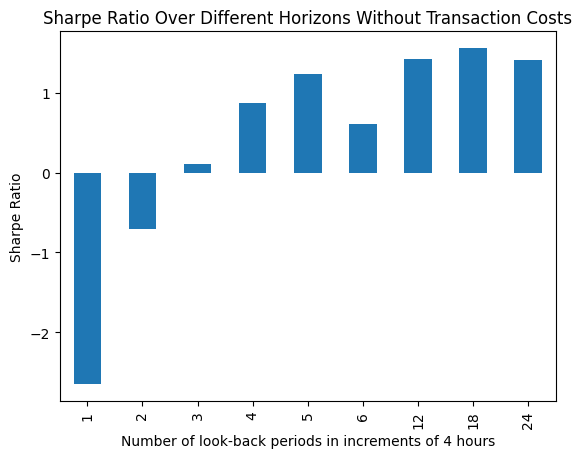

In [14]:
strat_1_gross_sr.plot(kind="bar", title="Sharpe Ratio Over Different Horizons Without Transaction Costs",
                xlabel="Number of look-back periods in increments of 4 hours",
                ylabel="Sharpe Ratio")

As we saw in the lectures, when we ignore transaction costs, we observe reversal at lower granularities (4 hours and 8 hours) but momentum at higher granularities (12 hours and higher).

In [15]:
def get_strat_1_annual_sr(strat_1_ret):
    yearly_resample = strat_1_ret.resample('YE')
    return yearly_resample.mean() / yearly_resample.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_annual_sr = get_strat_1_annual_sr(strat_1_gross_daily_ret)
strat_1_gross_annual_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-3.848973,-3.929144,-1.972403,-0.150801,0.931690,-0.934529,1.385555,1.262651,1.618204
2021-12-31,-1.619153,2.232237,2.724654,2.696765,2.947196,2.088487,2.158285,2.787853,2.450617
2022-12-31,-4.248749,-2.326282,-1.958102,-0.670873,-0.582913,-0.932779,0.343887,0.992499,0.547970
2023-12-31,-1.446593,-0.012718,-0.153086,0.246768,0.935695,1.083398,1.884401,1.142865,0.721788
2024-12-31,-3.195714,-1.540009,-0.043546,0.848687,0.595175,1.149194,1.076726,0.848918,0.962606
2025-12-31,-2.549339,3.724132,-0.020652,5.840981,2.158903,3.333118,5.322922,6.043009,1.401224


<Axes: title={'center': 'Sharpe Ratio Over Different Time Horizons Grouped By Year'}, xlabel='Year, number of lookback periods in increments of 4 hours', ylabel='Sharpe Ratio'>

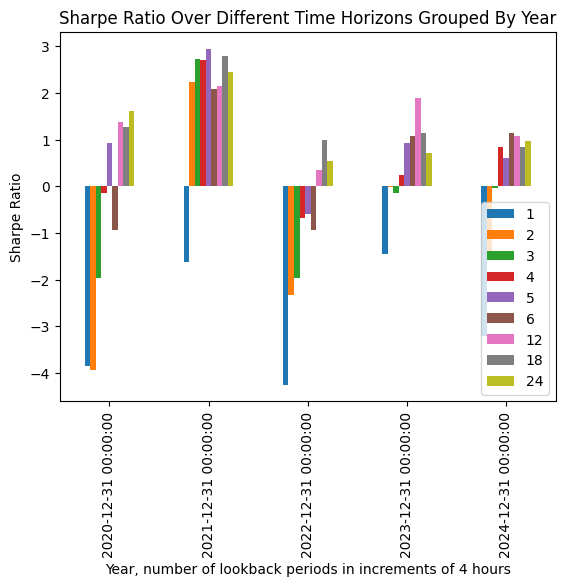

In [16]:
# Omit data from 2025 so far since it is likely too volatile to be useful over less than five days
strat_1_gross_annual_sr.iloc[:-1].plot(kind='bar',
                                       title="Sharpe Ratio Over Different Time Horizons Grouped By Year",
                                       xlabel="Year, number of lookback periods in increments of 4 hours",
                                       ylabel="Sharpe Ratio")

The strategy using a window of t=18 (3 days) seems to have a decent sharpe ratio overall (1.54) prior to
transaction costs.

### Strategy 1 With Transaction Costs

In [17]:
strat_1_net_daily_ret = get_strat_1_net_returns(strat_1_holdings, ret)
strat_1_net_daily_ret

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281
2020-01-01 12:00:00,-0.000485,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224
2020-01-01 16:00:00,-0.001334,-0.001384,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.011804,0.014852,0.013798,0.013131,0.013332,0.011464,0.012576,0.009806,0.008893
2025-01-11 20:00:00,0.005521,0.003415,0.007611,0.007073,0.006862,0.006991,0.007091,0.009823,0.002050
2025-01-12 00:00:00,0.003163,-0.000558,-0.001112,0.000868,0.000868,-0.001104,0.000460,0.000401,-0.000430
2025-01-12 04:00:00,-0.008434,-0.007047,-0.006754,-0.006161,-0.005073,-0.006622,-0.003759,-0.004386,-0.001217


In [18]:
strat_1_net_sr = get_strat_1_sr(strat_1_net_daily_ret)
strat_1_net_sr

1    -20.737216
2    -13.343782
3    -10.407629
4     -8.112228
5     -6.964613
6     -6.897459
12    -3.966690
18    -2.861906
24    -2.365647
dtype: float64

<Axes: title={'center': 'Sharpe Ratio For Strategy 1 Over Different Time Horizons'}>

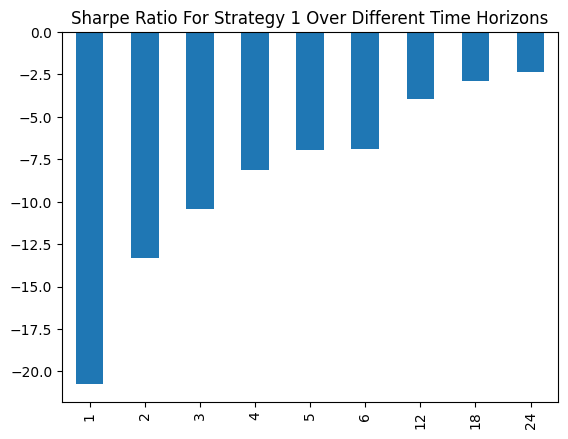

In [19]:
strat_1_net_sr.plot(kind='bar', title='Sharpe Ratio For Strategy 1 Over Different Time Horizons')

In [20]:
strat_1_annual_net_sr = get_strat_1_annual_sr(strat_1_net_daily_ret)
strat_1_annual_net_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-21.031334,-15.876341,-12.148299,-8.827155,-7.039332,-8.455215,-3.844958,-2.983348,-1.937347
2021-12-31,-13.451890,-5.703690,-3.803441,-2.787537,-2.003517,-2.446949,-1.125253,0.094664,0.260063
2022-12-31,-27.725324,-19.434049,-16.117718,-12.932315,-11.718566,-10.854681,-6.747374,-4.759926,-4.681088
2023-12-31,-28.993467,-20.106422,-17.059185,-14.046659,-11.807085,-10.529522,-6.491970,-5.637473,-5.274245
2024-12-31,-26.597023,-18.965743,-14.252453,-11.360359,-10.804976,-9.221851,-6.346870,-5.174634,-4.317617
2025-12-31,-25.584547,-12.667488,-14.006512,-6.420548,-8.773282,-6.554932,-2.637471,0.451596,-4.052471


<Axes: title={'center': 'Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year'}>

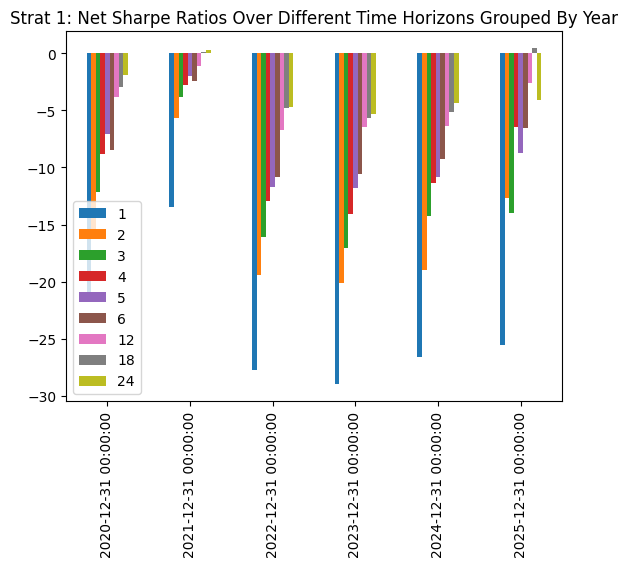

In [21]:
strat_1_annual_net_sr.plot(kind='bar',
                           title='Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year')

When transaction costs are taken into account, the strategy is no longer profitable.

## Strategy 2: Testing Different Time Horizons For Momentum And Reversal -- Top Coins And Bottom Coins

Similarly to strategy 1, long high-performing coins based on average 
returns and short low-performing coins averaged over different intervals
but only do this for the top 2 and bottom 2 coins. This is similar to 
the strategy from the course where only the top and bottom deciles were
kept in the portfolio.

In [22]:
def get_strat_2_signal(ret, window_look_back):
    rolling_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1)
    rolling_pct_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1, pct=True)
    positions = ((rolling_pct_ranks > 0.81) | (rolling_pct_ranks < 0.26))
    demeaned_positions = rolling_ranks[positions].subtract(rolling_ranks[positions].mean(axis=1), axis=0)
    return demeaned_positions.divide(demeaned_positions.abs().sum(axis=1), axis=0).fillna(0)

In [23]:
get_strat_2_signal(ret, 3)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
2020-01-01 04:00:00,0.000000,0.0,0.000000,-0.5,0.500000,0.000000,0.0,0.0
2020-01-01 08:00:00,0.000000,0.5,0.000000,-0.5,0.000000,0.000000,0.0,0.0
2020-01-01 12:00:00,0.000000,0.0,0.500000,-0.5,0.000000,0.000000,0.0,0.0
2020-01-01 16:00:00,0.000000,0.0,0.500000,-0.5,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.500000,0.0,0.181818,0.0,0.318182,0.000000,0.0,0.0
2025-01-11 20:00:00,-0.500000,0.0,0.181818,0.0,0.318182,0.000000,0.0,0.0
2025-01-12 00:00:00,0.000000,0.0,0.318182,0.0,0.181818,0.000000,0.0,-0.5
2025-01-12 04:00:00,0.000000,0.0,0.318182,0.0,0.000000,0.181818,0.0,-0.5


In [24]:
def get_strat_2_signal_time_horizon_dict(ret):
    strat_2_signals_data = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_2_signals_data[t] = get_strat_2_signal(ret, t)
    
    return strat_2_signals_data

strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
strat_2_signals_data[2]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2020-01-01 04:00:00,0.000000,0.0,0.000000,-0.500000,0.500000,0.000000,0.0,0.000000
2020-01-01 08:00:00,0.000000,0.5,0.000000,-0.500000,0.000000,0.000000,0.0,0.000000
2020-01-01 12:00:00,0.000000,0.0,0.500000,0.000000,-0.500000,0.000000,0.0,0.000000
2020-01-01 16:00:00,0.000000,0.0,0.500000,-0.500000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,0.000000,0.0,0.000000,0.000000,0.318182,-0.500000,0.0,0.181818
2025-01-11 20:00:00,-0.500000,0.0,0.181818,0.000000,0.318182,0.000000,0.0,0.000000
2025-01-12 00:00:00,0.000000,0.0,0.318182,-0.500000,0.000000,0.181818,0.0,0.000000
2025-01-12 04:00:00,0.181818,0.0,0.318182,0.000000,-0.500000,0.000000,0.0,0.000000


In [25]:
def get_strat_2_gross_returns(strat_2_signals_data, ret):
    strat_2_gross_returns_data = dict()
    for t in strat_2_signals_data:
        strat_2_gross_returns_data[t] = (strat_2_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_2_gross_returns_data)

strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
strat_2_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333
2020-01-01 12:00:00,0.002013,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920
2020-01-01 16:00:00,-0.000588,-0.000588,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.008322,0.019223,0.019223,0.019223,0.015917,0.019223,0.018374,0.015466,0.012422
2025-01-11 20:00:00,0.012352,-0.000926,0.012352,0.006397,0.006397,0.006397,0.010909,0.014235,0.006582
2025-01-12 00:00:00,0.005925,-0.000369,-0.000369,-0.000369,-0.000369,-0.000369,0.002309,0.001915,0.001915
2025-01-12 04:00:00,-0.006898,-0.008458,-0.004031,-0.007282,-0.003989,-0.007282,-0.001579,-0.004380,-0.002881


In [26]:
def get_strat_2_net_returns(strat_2_signals_data, ret):
    strat_2_net_returns_dict = dict()
    for t in strat_2_signals_data:
        strat_2_net_returns_dict[t] = get_net_return(strat_2_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_2_net_returns_dict)

strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
strat_2_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333
2020-01-01 12:00:00,-0.001987,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080
2020-01-01 16:00:00,-0.002588,-0.004588,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.012322,0.017223,0.017223,0.017223,0.015189,0.016496,0.017541,0.015466,0.012422
2025-01-11 20:00:00,0.008352,-0.001654,0.010352,0.006397,0.003670,0.006397,0.009742,0.013069,0.005749
2025-01-12 00:00:00,0.003379,-0.003097,-0.000369,-0.002369,-0.002369,-0.002369,0.001476,0.001582,0.001082
2025-01-12 04:00:00,-0.009625,-0.011730,-0.006576,-0.009827,-0.004534,-0.009827,-0.002518,-0.004713,-0.002881


In [27]:
def get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day):
    strat_2_results_stats = dict()
    strat_2_results_stats["gross_mean"] = strat_2_gross_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["net_mean"] = strat_2_net_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["gross_std"] = strat_2_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["net_std"] = strat_2_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["gross_sr"] = strat_2_results_stats["gross_mean"] / strat_2_results_stats["net_mean"]
    strat_2_results_stats["net_sr"] = strat_2_results_stats["net_mean"] / strat_2_results_stats["net_std"]
    
    strat_2_results_stats_df = pd.DataFrame(strat_2_results_stats)
    return strat_2_results_stats_df
    
get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.140773,-8.080904,0.451160,0.454395,0.141169,-17.783884
2,-0.309881,-5.449279,0.451204,0.455700,0.056866,-11.958031
3,0.001001,-4.324749,0.460655,0.465989,-0.000232,-9.280788
4,0.382076,-3.408855,0.465029,0.469244,-0.112083,-7.264563
5,0.515291,-2.885381,0.458032,0.460793,-0.178587,-6.261775
6,0.338331,-2.811538,0.464634,0.468436,-0.120337,-6.001965
12,0.550383,-1.739700,0.471738,0.474240,-0.316367,-3.668399
18,0.528572,-1.333487,0.461624,0.464408,-0.396383,-2.871368
24,0.590611,-1.023071,0.461856,0.464840,-0.577292,-2.200911


In [28]:
def get_strat_2_results(ret, periods_per_day):
    strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
    strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
    strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
    return get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day)

In [29]:
# Rebalance every 4 hours

strat_2_4hr_trades = get_strat_2_results(ret, 6)
strat_2_4hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.140773,-8.080904,0.451160,0.454395,0.141169,-17.783884
2,-0.309881,-5.449279,0.451204,0.455700,0.056866,-11.958031
3,0.001001,-4.324749,0.460655,0.465989,-0.000232,-9.280788
4,0.382076,-3.408855,0.465029,0.469244,-0.112083,-7.264563
5,0.515291,-2.885381,0.458032,0.460793,-0.178587,-6.261775
6,0.338331,-2.811538,0.464634,0.468436,-0.120337,-6.001965
12,0.550383,-1.739700,0.471738,0.474240,-0.316367,-3.668399
18,0.528572,-1.333487,0.461624,0.464408,-0.396383,-2.871368
24,0.590611,-1.023071,0.461856,0.464840,-0.577292,-2.200911


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

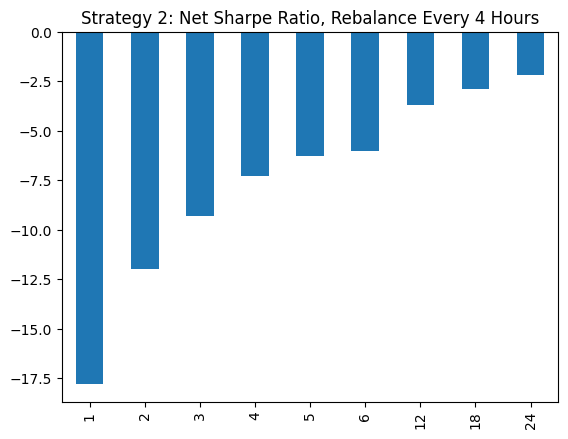

In [30]:
strat_2_4hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [31]:
# Rebalance every 8 hours

strat_2_8hr_trades = get_strat_2_results(ret.iloc[::2], 3)
strat_2_8hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.274678,-3.097027,0.328216,0.331090,-0.088691,-9.354039
2,0.421436,-2.044904,0.320080,0.321933,-0.206091,-6.351946
3,0.325252,-1.719569,0.335161,0.337607,-0.189147,-5.093409
4,0.477812,-1.288350,0.329510,0.331601,-0.370872,-3.885238
5,0.521921,-1.091785,0.333615,0.335683,-0.478044,-3.252430
6,0.574006,-0.874522,0.335714,0.336933,-0.656365,-2.595537
12,0.436287,-0.577239,0.318441,0.320160,-0.755817,-1.802970
18,0.325730,-0.514605,0.326549,0.328024,-0.632971,-1.568801
24,0.347811,-0.369791,0.330793,0.331880,-0.940559,-1.114230


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

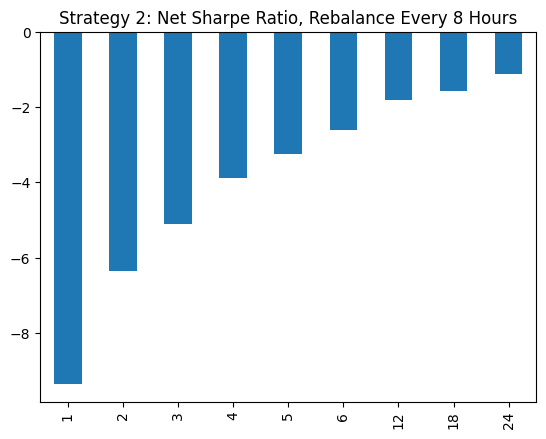

In [32]:
strat_2_8hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [33]:
# Rebalance every 12 hours

strat_2_12hr_trades = get_strat_2_results(ret.iloc[::3], 2)
strat_2_12hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.288401,-1.940996,0.267469,0.268656,-0.148584,-7.224844
2,0.106308,-1.546658,0.274094,0.275305,-0.068734,-5.617973
3,0.085393,-1.274301,0.272245,0.274265,-0.067011,-4.646236
4,0.178062,-0.991766,0.274036,0.274886,-0.179541,-3.607919
5,0.111758,-0.958431,0.275136,0.276922,-0.116605,-3.461021
6,0.071164,-0.911813,0.274908,0.276135,-0.078047,-3.302052
12,0.067334,-0.641709,0.264002,0.265158,-0.104930,-2.420096
18,0.041020,-0.549524,0.266962,0.267791,-0.074646,-2.052065
24,0.164308,-0.344404,0.280471,0.281007,-0.477079,-1.225607


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

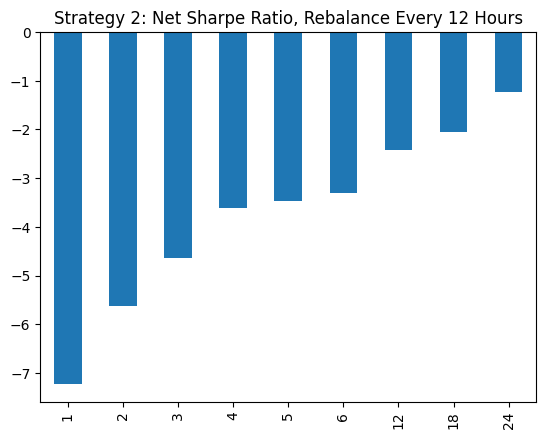

In [34]:
strat_2_12hr_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [35]:
# Rebalance once a day
strat_2_1d_trades = get_strat_2_results(ret.iloc[::6], 1)
strat_2_1d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.018209,-1.108165,0.180544,0.181726,-0.016432,-6.098008
2,0.086116,-0.728673,0.182037,0.183877,-0.118182,-3.962821
3,0.121892,-0.554489,0.180373,0.181849,-0.219827,-3.049168
4,-0.010457,-0.616051,0.180016,0.182322,0.016975,-3.378912
5,0.082715,-0.453171,0.182714,0.184107,-0.182525,-2.461451
6,0.101225,-0.388410,0.182690,0.184566,-0.260615,-2.104450
12,0.069602,-0.272766,0.190355,0.192758,-0.255171,-1.415065
18,0.120225,-0.156780,0.189975,0.191663,-0.766840,-0.817998
24,0.112305,-0.137527,0.189781,0.191464,-0.816606,-0.718292


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once A Day'}>

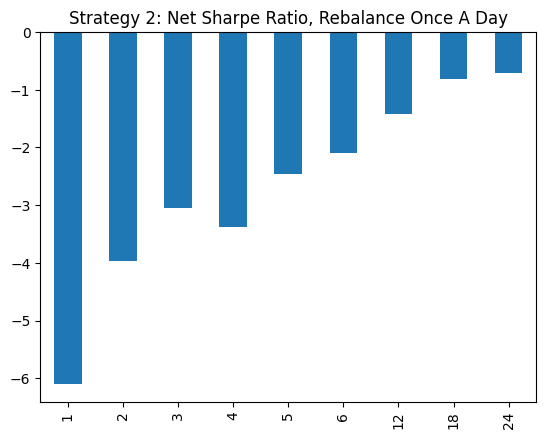

In [36]:
strat_2_1d_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Once A Day')

In [37]:
# Rebalance once every two days

strat_2_2d_trades = get_strat_2_results(ret.iloc[::12], 0.5)
strat_2_2d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.038674,-0.527650,0.130600,0.130530,-0.073295,-4.042351
2,-0.029036,-0.444930,0.128892,0.128920,0.065260,-3.451206
3,0.024542,-0.309648,0.130371,0.131842,-0.079257,-2.348624
4,-0.022822,-0.315072,0.133766,0.135428,0.072436,-2.326493
5,-0.031250,-0.291390,0.132963,0.133827,0.107244,-2.177371
6,0.002079,-0.237366,0.138860,0.140289,-0.008757,-1.691973
12,-0.008058,-0.188652,0.131368,0.131836,0.042712,-1.430962
18,0.025391,-0.112500,0.129166,0.130064,-0.225696,-0.864956
24,0.040679,-0.079076,0.119559,0.119777,-0.514422,-0.660195


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

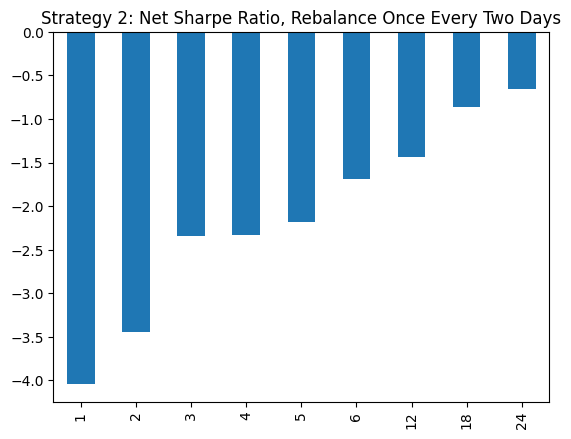

In [38]:
strat_2_2d_trades['net_sr'].plot(kind='bar',
                                 title='Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 3: Testing With The Most Recent Interval Removed

Similar to strategy 1: difference is to not include most recent 
period in rolling window.

In [39]:
def get_strat_3_signal(ret, window_look_back):
    ranked_avgs = ret.rolling(window=window_look_back, min_periods=1).mean().shift().rank(axis=1)
    demeaned_ranked_avgs = ranked_avgs.subtract(ranked_avgs.mean(axis=1), axis=0)
    return demeaned_ranked_avgs.divide(demeaned_ranked_avgs.abs().sum(axis=1), axis=0)

get_strat_3_signal(ret, 4)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.083333,0.083333,0.166667,-0.166667,0.250000,-0.250000,NaN,0.000000
2025-01-11 20:00:00,-0.166667,0.083333,0.166667,-0.083333,0.250000,-0.250000,NaN,0.000000
2025-01-12 00:00:00,-0.250000,0.000000,0.166667,-0.083333,0.250000,0.083333,NaN,-0.166667
2025-01-12 04:00:00,-0.166667,-0.083333,0.250000,-0.250000,0.166667,0.083333,NaN,0.000000


In [40]:
def get_strat_3_signal_time_horizon_dict(ret):
    strat_3_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_3_signal_dict[t] = get_strat_3_signal(ret, t)
    return strat_3_signal_dict

strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
strat_3_signals_data[4]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.083333,0.083333,0.166667,-0.166667,0.250000,-0.250000,NaN,0.000000
2025-01-11 20:00:00,-0.166667,0.083333,0.166667,-0.083333,0.250000,-0.250000,NaN,0.000000
2025-01-12 00:00:00,-0.250000,0.000000,0.166667,-0.083333,0.250000,0.083333,NaN,-0.166667
2025-01-12 04:00:00,-0.166667,-0.083333,0.250000,-0.250000,0.166667,0.083333,NaN,0.000000


In [41]:
def get_strat_3_gross_returns(strat_3_signals_data, ret):
    strat_3_gross_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_gross_returns_data[t] = (strat_3_signals_data[t] * ret).sum(axis=1)
    return pd.DataFrame(strat_3_gross_returns_data)

strat_3_gross_returns_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
strat_3_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-1.281039e-03,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281
2020-01-01 12:00:00,2.181741e-03,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558
2020-01-01 16:00:00,-7.816796e-07,0.000616,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-8.137033e-03,0.015852,0.015131,0.015131,0.014665,0.014130,0.013326,0.009806,0.008893
2025-01-11 20:00:00,8.854299e-03,0.004081,0.008611,0.007406,0.007862,0.007991,0.008341,0.011323,0.002550
2025-01-12 00:00:00,5.163320e-03,0.001442,-0.000112,0.002202,0.002202,-0.000438,0.001710,0.000651,0.000320
2025-01-12 04:00:00,-6.100577e-03,-0.005380,-0.004420,-0.004827,-0.004406,-0.004955,-0.002801,-0.003636,-0.001217


In [42]:
def get_strat_3_net_returns(strat_3_signals_data, ret):
    strat_3_net_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_net_returns_data[t] = get_net_return(strat_3_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_3_net_returns_data)

strat_3_net_returns_df = get_strat_3_net_returns(strat_3_signals_data, ret)
strat_3_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784
2020-01-01 16:00:00,-0.002072,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,0.012582,0.012249,0.013294,0.012623,0.011929,0.010251,0.012131,0.008806,0.008643
2025-01-11 20:00:00,-0.017274,0.006406,0.005991,0.005324,0.004635,0.004948,0.008216,0.000874,-0.001644
2025-01-12 00:00:00,-0.003771,-0.003093,-0.000678,0.000218,-0.001621,-0.001199,-0.000869,-0.000553,-0.005836
2025-01-12 04:00:00,-0.004953,-0.003696,-0.002054,-0.003699,-0.003699,-0.001178,-0.003174,-0.001751,-0.001967


In [43]:
def get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, periods_per_day):
    strat_3_results_stats_data = dict()
    strat_3_results_stats_data["gross_mean"] = strat_3_gross_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["net_mean"] = strat_3_net_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["gross_std"] = strat_3_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["net_std"] = strat_3_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["gross_sr"] = \
        strat_3_results_stats_data["gross_mean"] / strat_3_results_stats_data["gross_std"]
    strat_3_results_stats_data["net_sr"] = \
        strat_3_results_stats_data["net_mean"] / strat_3_results_stats_data["net_std"]
    
    return pd.DataFrame(strat_3_results_stats_data)

get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.862441,-5.615504,0.325599,0.328587,-2.648784,-17.089861
2,-0.234661,-3.720838,0.331955,0.327586,-0.706907,-11.358347
3,0.034807,-2.781526,0.332907,0.331611,0.104556,-8.387911
4,0.297248,-2.353480,0.340176,0.332143,0.873805,-7.085742
5,0.413866,-2.270851,0.336571,0.333766,1.229655,-6.803724
6,0.208068,-2.038330,0.339184,0.329896,0.613438,-6.178698
12,0.479011,-1.218157,0.337652,0.332901,1.418655,-3.659218
18,0.518972,-0.832450,0.333411,0.329261,1.556554,-2.528240
24,0.475699,-0.677151,0.337337,0.333826,1.410158,-2.028454


In [44]:
def get_strat_3_results(ret, periods_per_day):
    strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
    strat_3_gross_rets_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
    strat_3_net_rets_df = get_strat_3_net_returns(strat_3_signals_data, ret)
    return get_strat_3_results_stats(strat_3_gross_rets_df, strat_3_net_rets_df, periods_per_day)

In [45]:
# Rebalance every 4 hours
strat_3_4hr_results = get_strat_3_results(ret, 6)
strat_3_4hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.862441,-5.615504,0.325599,0.328587,-2.648784,-17.089861
2,-0.234661,-3.720838,0.331955,0.327586,-0.706907,-11.358347
3,0.034807,-2.781526,0.332907,0.331611,0.104556,-8.387911
4,0.297248,-2.353480,0.340176,0.332143,0.873805,-7.085742
5,0.413866,-2.270851,0.336571,0.333766,1.229655,-6.803724
6,0.208068,-2.038330,0.339184,0.329896,0.613438,-6.178698
12,0.479011,-1.218157,0.337652,0.332901,1.418655,-3.659218
18,0.518972,-0.832450,0.333411,0.329261,1.556554,-2.528240
24,0.475699,-0.677151,0.337337,0.333826,1.410158,-2.028454


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

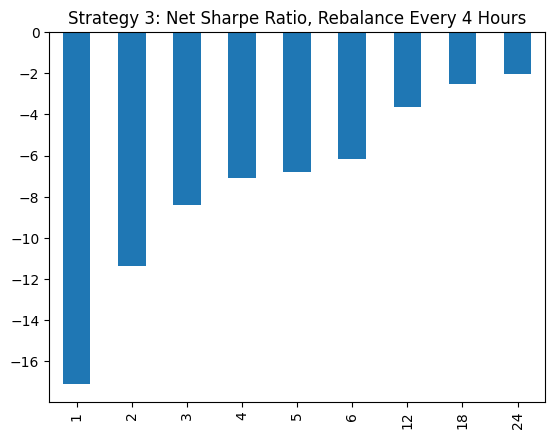

In [46]:
strat_3_4hr_results['net_sr'].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [47]:
strat_3_net_sr_by_year = strat_3_net_returns_df.resample('YE').mean() / strat_3_net_returns_df.std() * np.sqrt(365 * 6)
strat_3_net_sr_by_year

,1,2,3,4,5,6,12,18,24
2020-12-31,-19.669098,-11.805768,-8.819825,-6.107708,-7.879441,-7.469685,-3.935527,-2.199131,-0.876051
2021-12-31,-12.505022,-7.349686,-5.014253,-4.260362,-4.082627,-3.505583,-1.235691,0.172573,0.123053
2022-12-31,-18.101883,-12.872494,-9.762610,-8.496423,-7.572151,-6.898363,-4.572993,-3.102893,-2.809996
2023-12-31,-17.552324,-13.043912,-9.967494,-8.460676,-7.604019,-6.443511,-4.213041,-3.694873,-3.452761
2024-12-31,-17.624332,-11.710881,-8.520135,-8.127538,-6.934946,-6.693008,-4.449295,-3.792826,-3.072185
2025-12-31,-16.712570,-11.574150,-3.744261,-6.318526,-4.966962,-2.319072,-0.060723,-3.210241,-3.762234


<Axes: >

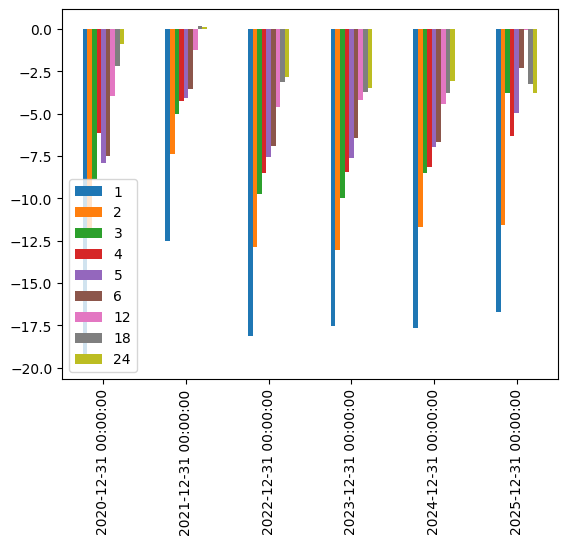

In [48]:
strat_3_net_sr_by_year.plot(kind='bar')

In [49]:
# Rebalance every 8 hours

strat_3_8hr_results = get_strat_3_results(ret.iloc[::2], 3)
strat_3_8hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.200065,-2.617063,0.237962,0.228872,0.840744,-11.434599
2,0.289342,-1.868044,0.234206,0.239703,1.235418,-7.793155
3,0.242042,-1.482300,0.243768,0.240563,0.992920,-6.161789
4,0.327367,-1.279128,0.240781,0.238249,1.359605,-5.368876
5,0.415389,-1.044708,0.242451,0.240561,1.713290,-4.342805
6,0.421954,-0.919522,0.241774,0.235876,1.745243,-3.898324
12,0.307644,-0.641224,0.230481,0.232374,1.334792,-2.759445
18,0.205778,-0.526901,0.237137,0.233732,0.867758,-2.254292
24,0.286474,-0.423212,0.237936,0.235504,1.203996,-1.797045


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

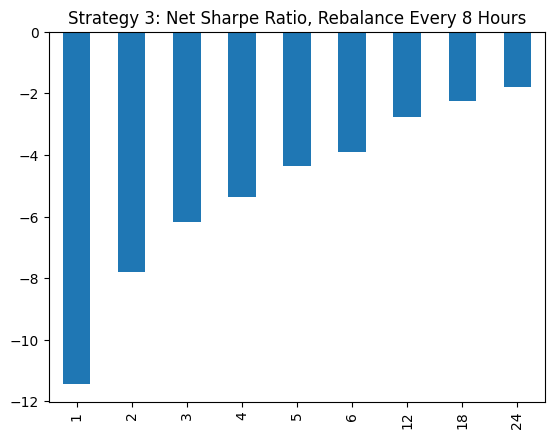

In [50]:
strat_3_8hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [51]:
# Rebalance every 12 hours

strat_3_12hr_results = get_strat_3_results(ret.iloc[::3], 2)
strat_3_12hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.210314,-1.970928,0.196306,0.199047,1.071355,-9.901821
2,0.080469,-1.393825,0.199692,0.205876,0.402963,-6.770227
3,0.067225,-1.142152,0.199500,0.198785,0.336969,-5.745671
4,0.102236,-1.034867,0.200599,0.203581,0.509656,-5.083323
5,0.054319,-0.908933,0.201660,0.203581,0.269361,-4.464735
6,0.048185,-0.832961,0.201452,0.202125,0.239187,-4.121030
12,0.072986,-0.596276,0.193796,0.194419,0.376615,-3.066970
18,0.029112,-0.440314,0.196339,0.200286,0.148275,-2.198428
24,0.153880,-0.362662,0.202534,0.199578,0.759771,-1.817141


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

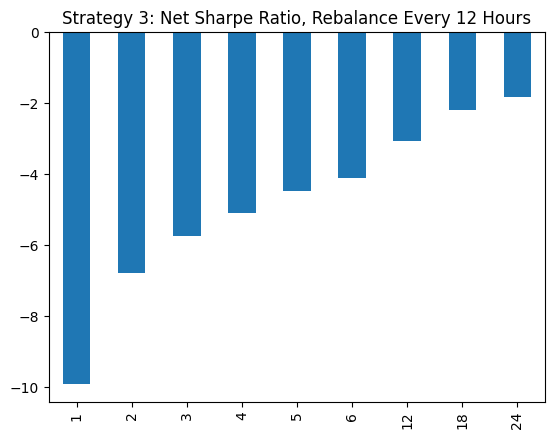

In [52]:
strat_3_12hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [53]:
# Rebalance once a day

strat_3_1d_results = get_strat_3_results(ret.iloc[::6], 1)
strat_3_1d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.005614,-0.876110,0.135524,0.129916,0.041424,-6.743639
2,0.082641,-0.551504,0.132047,0.129450,0.625848,-4.260354
3,0.057028,-0.480847,0.132035,0.126893,0.431917,-3.789372
4,-0.006556,-0.407883,0.128556,0.128011,-0.051000,-3.186321
5,0.025502,-0.329381,0.130713,0.132287,0.195098,-2.489896
6,0.045274,-0.278724,0.132828,0.132014,0.340848,-2.111314
12,0.052389,-0.137349,0.138644,0.128073,0.377871,-1.072428
18,0.107972,-0.103184,0.136375,0.133580,0.791731,-0.772456
24,0.096994,-0.073784,0.134659,0.129708,0.720295,-0.568845


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once A Day'}>

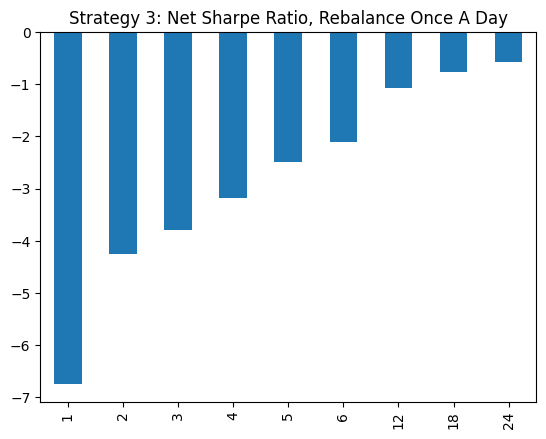

In [54]:
strat_3_1d_results['net_sr'].plot(kind='bar', title="Strategy 3: Net Sharpe Ratio, Rebalance Once A Day")

In [55]:
strat_3_2d_results = get_strat_3_results(ret.iloc[::12], 0.5)
strat_3_2d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.064917,-0.442323,0.096396,0.094581,0.673437,-4.676657
2,0.037739,-0.352701,0.095939,0.094325,0.393363,-3.739223
3,0.030581,-0.292128,0.097237,0.091541,0.314502,-3.191210
4,-0.016032,-0.263066,0.094596,0.089766,-0.169476,-2.930574
5,-0.014502,-0.216218,0.096121,0.098305,-0.150873,-2.199453
6,-0.005358,-0.208034,0.098887,0.100373,-0.054182,-2.072612
12,0.011718,-0.121513,0.099698,0.095926,0.117536,-1.266740
18,0.041008,-0.075890,0.094875,0.095590,0.432231,-0.793916
24,0.030429,-0.048124,0.097461,0.097352,0.312216,-0.494332


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

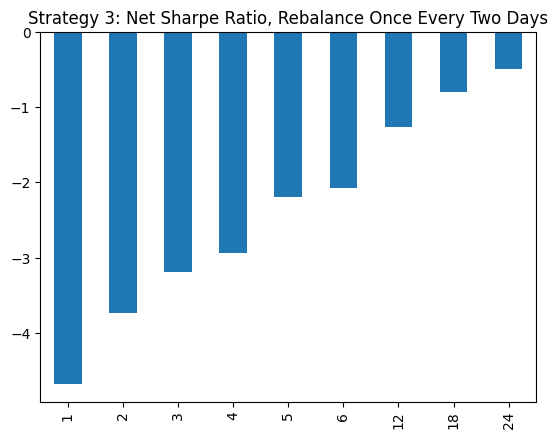

In [56]:
strat_3_2d_results['net_sr'].plot(kind='bar',
                                  title='Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 4: Trade Around Periods Of High Volume With New Information

Use high volume as a signal for high activity. When this is coupled with activity (e.g. look up on Twitter), then this could combine to yield momentum.

Try using exponential decay for the moving average: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [57]:
def get_strat_4_signal(volume_df, window_look_back):
    volume_change = (volume_df / volume_df.shift() - 1).rolling(window=window_look_back, min_periods=1).mean()
    demeaned_volume_change = volume_change.rank(axis=1).subtract(volume_change.rank(axis=1).mean(axis=1), axis=0)
    return demeaned_volume_change.divide(demeaned_volume_change.abs().sum(axis=1), axis=0)

get_strat_4_signal(volume_df, 6)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,0.083333,-0.250000,0.166667,-0.166667,0.250000,-0.083333,NaN,0.000000
2025-01-11 20:00:00,-0.083333,-0.166667,0.166667,-0.250000,0.083333,0.250000,NaN,0.000000
2025-01-12 00:00:00,-0.083333,-0.166667,0.166667,-0.250000,0.083333,0.250000,NaN,0.000000
2025-01-12 04:00:00,-0.083333,-0.166667,0.166667,-0.250000,0.083333,0.250000,NaN,0.000000


In [58]:
def get_strat_4_signal_time_horizon_dict(volume_df):
    strat_4_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_4_signal_dict[t] = get_strat_4_signal(volume_df, t)
    return strat_4_signal_dict

strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
strat_4_signals_data[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,0.083333,-0.250000,0.166667,-0.166667,0.250000,-0.083333,NaN,0.000000
2025-01-11 20:00:00,-0.083333,-0.166667,0.166667,-0.250000,0.083333,0.250000,NaN,0.000000
2025-01-12 00:00:00,-0.083333,-0.166667,0.166667,-0.250000,0.083333,0.250000,NaN,0.000000
2025-01-12 04:00:00,-0.083333,-0.166667,0.166667,-0.250000,0.083333,0.250000,NaN,0.000000


In [59]:
def get_strat_4_gross_returns(strat_4_signals_data, ret):
    strat_4_gross_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_gross_returns_data[t] = (strat_4_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_4_gross_returns_data)

strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
strat_4_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469
2020-01-01 12:00:00,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008
2020-01-01 16:00:00,-0.000210,-0.001239,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.006718,0.011723,0.012257,0.013166,0.012979,0.006674,0.004941,0.000096,-0.002730
2025-01-11 20:00:00,0.006818,0.002013,0.009710,0.010832,0.011075,0.009953,-0.004605,-0.002185,-0.007989
2025-01-12 00:00:00,0.007577,0.006264,0.006264,0.006264,0.006264,0.006264,-0.000464,-0.000464,-0.001096
2025-01-12 04:00:00,0.000352,-0.004289,-0.004286,-0.004286,-0.004286,-0.004286,-0.000873,-0.001568,0.001867


In [60]:
def get_strat_4_net_returns(strat_4_signals_data, ret):
    strat_4_net_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_net_returns_data[t] = get_net_return(strat_4_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_4_net_returns_data)

strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
strat_4_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469
2020-01-01 12:00:00,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674
2020-01-01 16:00:00,-0.002876,-0.003239,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248
...,...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.009718,0.009723,0.010924,0.012166,0.010645,0.003674,0.004441,0.000096,-0.002730
2025-01-11 20:00:00,0.003151,-0.000320,0.008043,0.008498,0.008742,0.007953,-0.004855,-0.003935,-0.008239
2025-01-12 00:00:00,0.004577,0.004597,0.004931,0.004931,0.004597,0.004597,-0.001964,-0.001714,-0.002096
2025-01-12 04:00:00,-0.003315,-0.005956,-0.004286,-0.004286,-0.004286,-0.004286,-0.001914,-0.001568,0.001617


In [61]:
# strat_4_net_returns_df.mean()

def get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day):
    strat_4_results_stats_data = dict()
    strat_4_results_stats_data["gross_mean"] = strat_4_gross_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["gross_std"] = strat_4_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["net_mean"] = strat_4_net_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["net_std"] = strat_4_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["gross_sr"] = strat_4_results_stats_data["gross_mean"] / strat_4_results_stats_data["gross_std"]
    strat_4_results_stats_data["net_sr"] = strat_4_results_stats_data["net_mean"] / strat_4_results_stats_data["net_std"]
    return pd.DataFrame(strat_4_results_stats_data)

get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, 6)

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.054833,0.295547,-6.822251,0.297245,0.185530,-22.951642
2,0.310273,0.295417,-4.625204,0.299026,1.050291,-15.467578
3,0.199394,0.296740,-3.798251,0.300611,0.671950,-12.635084
4,0.251163,0.295931,-3.234958,0.299889,0.848721,-10.787180
5,0.299700,0.294211,-2.769251,0.297460,1.018657,-9.309652
6,0.396493,0.299652,-2.257398,0.302264,1.323179,-7.468292
12,0.230030,0.300034,-1.482163,0.301668,0.766680,-4.913230
18,0.053242,0.301708,-1.215969,0.302576,0.176469,-4.018729
24,-0.016370,0.304693,-1.024008,0.306011,-0.053727,-3.346317


In [62]:
def get_strat_4_results(ret, volume_df, periods_per_day):
    strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
    strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
    strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
    return get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day)

In [63]:
strat_4_4hr_results = get_strat_4_results(ret, volume_df, 6)
strat_4_4hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.054833,0.295547,-6.822251,0.297245,0.185530,-22.951642
2,0.310273,0.295417,-4.625204,0.299026,1.050291,-15.467578
3,0.199394,0.296740,-3.798251,0.300611,0.671950,-12.635084
4,0.251163,0.295931,-3.234958,0.299889,0.848721,-10.787180
5,0.299700,0.294211,-2.769251,0.297460,1.018657,-9.309652
6,0.396493,0.299652,-2.257398,0.302264,1.323179,-7.468292
12,0.230030,0.300034,-1.482163,0.301668,0.766680,-4.913230
18,0.053242,0.301708,-1.215969,0.302576,0.176469,-4.018729
24,-0.016370,0.304693,-1.024008,0.306011,-0.053727,-3.346317


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

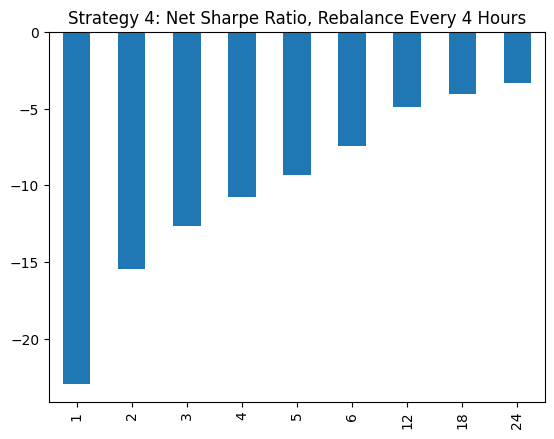

In [64]:
strat_4_4hr_results["net_sr"].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [65]:
strat_4_8hr_results = get_strat_4_results(ret[::2], volume_df[::2], 3)
strat_4_8hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.103331,0.216720,-3.419612,0.217271,0.476793,-15.738914
2,0.053009,0.213330,-2.419429,0.215956,0.248485,-11.203346
3,0.129475,0.218129,-1.721054,0.220408,0.593569,-7.808504
4,0.152452,0.217384,-1.489034,0.219777,0.701304,-6.775210
5,0.235293,0.217751,-1.235969,0.219913,1.080562,-5.620258
6,0.240928,0.219269,-0.996469,0.221128,1.098780,-4.506300
12,0.168299,0.220733,-0.602457,0.221728,0.762457,-2.717102
18,0.125609,0.214531,-0.442024,0.215369,0.585504,-2.052402
24,0.141153,0.214462,-0.325842,0.215084,0.658170,-1.514955


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

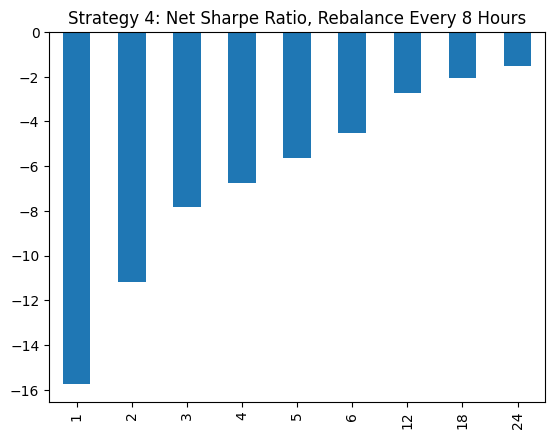

In [66]:
strat_4_8hr_results['net_sr'].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [67]:
strat_4_12hr_results = get_strat_4_results(ret[::3], volume_df[::3], 2)
strat_4_12hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.077405,0.183824,-2.288025,0.184178,0.421081,-12.422928
2,0.058592,0.185377,-1.579576,0.186296,0.316069,-8.478873
3,0.057420,0.182723,-1.314989,0.183985,0.314245,-7.147283
4,0.102942,0.183774,-1.051455,0.185301,0.560155,-5.674294
5,0.016736,0.186855,-1.029665,0.188349,0.089566,-5.466789
6,0.030619,0.187892,-0.891507,0.189149,0.162963,-4.713243
12,0.073536,0.182447,-0.521598,0.182879,0.403054,-2.852149
18,0.042129,0.183968,-0.409524,0.184006,0.229004,-2.225604
24,0.054737,0.178808,-0.304230,0.179536,0.306122,-1.694537


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

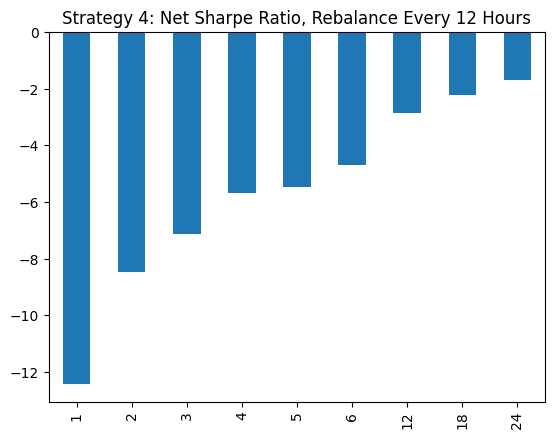

In [68]:
strat_4_12hr_results["net_sr"].plot(kind="bar",
                                    title="Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours")

In [69]:
strat_4_1d_results = get_strat_4_results(ret[::6], volume_df[::6], 1)
strat_4_1d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.046490,0.123257,-1.128113,0.123776,0.377183,-9.114126
2,-0.022983,0.127120,-0.851819,0.128189,-0.180794,-6.645037
3,0.024367,0.131692,-0.650710,0.133361,0.185031,-4.879312
4,0.001868,0.129544,-0.580873,0.130679,0.014419,-4.445038
5,0.012616,0.120133,-0.505719,0.121438,0.105017,-4.164407
6,-0.010697,0.117327,-0.479564,0.118624,-0.091173,-4.042721
12,-0.015550,0.119871,-0.313779,0.120530,-0.129723,-2.603334
18,0.014911,0.124077,-0.212398,0.124744,0.120176,-1.702667
24,0.004711,0.116379,-0.180358,0.116328,0.040479,-1.550431


In [70]:
strat_4_2d_results = get_strat_4_results(ret[::12], volume_df[::12], 0.5)
strat_4_2d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,-0.018698,0.091181,-0.603147,0.091702,-0.205067,-6.577277
2,-0.002180,0.089368,-0.411502,0.091307,-0.024397,-4.506791
3,-0.001233,0.087542,-0.322225,0.088569,-0.014087,-3.638121
4,0.021251,0.088173,-0.259202,0.088853,0.241018,-2.917196
5,0.008292,0.090960,-0.244511,0.091502,0.091162,-2.672197
6,0.010229,0.093188,-0.213700,0.093979,0.109772,-2.273910
12,0.005013,0.086779,-0.131551,0.087209,0.057768,-1.508458
18,-0.032286,0.094278,-0.135430,0.094573,-0.342460,-1.432026
24,-0.018367,0.095152,-0.107443,0.095444,-0.193022,-1.125721


In [71]:
exponential_volume_change = (volume_df / volume_df.shift() - 1).ewm(alpha=0.1).mean()
exponential_volume_change

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.034552,0.279374,-0.356284,1.051004,-0.201748,NaN,NaN,NaN
2020-01-01 12:00:00,0.977872,0.377529,-0.066166,0.413377,-0.465335,NaN,NaN,NaN
2020-01-01 16:00:00,0.614874,0.046652,-0.032906,0.378402,2.289373,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,0.500672,2.136116,0.574432,0.806706,1.537844,0.862282,3.7527,2.181696
2025-01-11 20:00:00,0.443597,2.033951,1.339652,0.747875,1.464355,4.116385,3.7527,2.297292
2025-01-12 00:00:00,0.387249,1.881077,1.184831,0.656144,1.234126,3.607506,3.7527,1.993934
2025-01-12 04:00:00,0.289556,1.610326,0.988147,0.541361,1.040886,3.370112,3.7527,1.780771


In [72]:
demeaned_exponential_volume_change = exponential_volume_change.rank(axis=1).subtract(
    exponential_volume_change.rank(axis=1).mean(axis=1), axis=0)
exponential_volume_holdings = demeaned_exponential_volume_change.divide(demeaned_exponential_volume_change.abs().sum(axis=1), axis=0)
exponential_volume_holdings

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.218750,0.093750,-0.156250,-0.093750,0.031250,-0.03125,0.21875,0.15625
2025-01-11 20:00:00,-0.218750,0.031250,-0.093750,-0.156250,-0.031250,0.21875,0.15625,0.09375
2025-01-12 00:00:00,-0.218750,0.031250,-0.093750,-0.156250,-0.031250,0.15625,0.21875,0.09375
2025-01-12 04:00:00,-0.218750,0.031250,-0.093750,-0.156250,-0.031250,0.15625,0.21875,0.09375


In [73]:
exponential_volume_gross_returns = (exponential_volume_holdings.shift() * ret).sum(axis=1)
exponential_volume_gross_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.002469
2020-01-01 12:00:00   -0.001008
2020-01-01 16:00:00   -0.002248
                         ...   
2025-01-11 16:00:00    0.000096
2025-01-11 20:00:00   -0.007306
2025-01-12 00:00:00   -0.000485
2025-01-12 04:00:00    0.000355
2025-01-12 08:00:00    0.000980
Freq: 4h, Length: 11031, dtype: float64

In [74]:
exponential_volume_gross_returns.mean() * 365 * 6

0.1847956415824027

In [75]:
exponential_volume_gross_returns.mean() / exponential_volume_gross_returns.std() * np.sqrt(365 * 6)

0.629292949239936

In [76]:
exponential_volume_net_returns = get_net_return(exponential_volume_holdings.shift(), ret)
exponential_volume_net_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000469
2020-01-01 12:00:00   -0.003674
2020-01-01 16:00:00   -0.004248
                         ...   
2025-01-11 16:00:00   -0.000154
2025-01-11 20:00:00   -0.007556
2025-01-12 00:00:00   -0.001735
2025-01-12 04:00:00    0.000105
2025-01-12 08:00:00    0.000980
Freq: 4h, Length: 11031, dtype: float64

In [77]:
exponential_volume_net_returns.mean() * 365 * 6

-1.1667703618019991

Try weighting earlier volume changes more.

In [78]:
volume_change_df = volume_df / volume_df.shift() - 1
volume_change_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.887267,1.194437,-0.863793,2.177665,0.472819,NaN,NaN,NaN
2020-01-01 12:00:00,2.590949,0.545372,0.429937,-0.676966,-0.916069,NaN,NaN,NaN
2020-01-01 16:00:00,-0.270478,-0.760356,0.048214,0.293099,9.008108,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,1.831021,-0.359656,0.380676,-0.095806,4.474190,2.146715,NaN,-0.159681
2025-01-11 20:00:00,-0.070079,1.114466,8.226636,0.218397,0.802951,33.403318,NaN,3.337649
2025-01-12 00:00:00,-0.119884,0.505212,-0.208556,-0.169440,-0.837934,-0.972413,NaN,-0.736289
2025-01-12 04:00:00,-0.589681,-0.826436,-0.782008,-0.491687,-0.698274,1.233574,NaN,-0.137691


In [79]:
reverse_exponential_weighting = (volume_change_df + 2 * volume_change_df.shift() + 4 * volume_change_df.shift(2) + 8 * volume_change_df.shift(3)) / 15
reverse_exponential_weighting

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,0.077148,-0.052717,-0.059078,0.402873,0.097140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.142523,-0.256707,0.321134,-0.242404,0.423739,0.173652,NaN,-0.066700
2025-01-11 20:00:00,0.266756,0.115177,2.012050,0.036353,1.361324,1.892060,NaN,0.238956
2025-01-12 00:00:00,0.987526,0.479869,1.187832,0.114914,1.340276,4.484019,NaN,1.044867
2025-01-12 04:00:00,0.902560,0.117640,2.316856,-0.048229,2.442079,10.005049,NaN,0.697525


In [80]:
ranked_rew = reverse_exponential_weighting.rank(axis=1).subtract(reverse_exponential_weighting.rank(axis=1).mean(axis=1), axis=0)
rrew = ranked_rew.divide(ranked_rew.abs().sum(axis=1), axis=0)
rrew

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,0.000000,-0.166667,-0.333333,0.333333,0.166667,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,-0.083333,-0.250000,0.166667,-0.166667,0.250000,0.083333,NaN,0.000000
2025-01-11 20:00:00,0.000000,-0.166667,0.250000,-0.250000,0.083333,0.166667,NaN,-0.083333
2025-01-12 00:00:00,-0.083333,-0.166667,0.083333,-0.250000,0.166667,0.250000,NaN,0.000000
2025-01-12 04:00:00,0.000000,-0.166667,0.083333,-0.250000,0.166667,0.250000,NaN,-0.083333


In [81]:
get_net_return(rrew.shift(), ret).mean() * 365 * 6

-4.294438880023191

Try grouping data by day (less specific granularity).

In [82]:
daily_volume_df = volume_df.groupby(volume_df.index.date).sum()
daily_volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,31.403883,419.85641,333132.3,1210.780,568474.4,0.00,0.0,0.000
2020-01-02,67.004407,298.29122,257302.4,2052.780,124152.7,0.00,0.0,0.000
2020-01-03,102.621386,513.53291,422872.0,7458.020,183712.9,0.00,0.0,0.000
2020-01-04,32.271372,87.49993,199212.9,1956.270,96464.2,0.00,0.0,0.000
2020-01-05,67.247638,275.28558,553095.4,2998.830,168050.5,0.00,0.0,0.000
...,...,...,...,...,...,...,...,...
2025-01-08,22.734570,196.66370,1036650.7,444.663,905236.0,5286.06,91809.5,10575.725
2025-01-09,21.902520,157.85480,1060132.1,337.270,457544.0,7067.76,16137.0,5170.333
2025-01-10,23.755250,114.95760,1044841.7,606.852,453875.0,8120.42,431.1,3917.962
2025-01-11,2.632760,42.81270,676524.3,151.695,1137379.0,1957.08,0.0,2400.547


In [83]:
daily_volume_change_df = daily_volume_df / daily_volume_df.shift() - 1
daily_volume_change_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,1.133634,-0.289540,-0.227627,0.695419,-0.781604,NaN,NaN,NaN
2020-01-03,0.531562,0.721582,0.643483,2.633132,0.479733,NaN,NaN,NaN
2020-01-04,-0.685530,-0.829612,-0.528905,-0.737696,-0.474919,NaN,NaN,NaN
2020-01-05,1.083817,2.146123,1.776404,0.532933,0.742102,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08,0.138062,-0.517513,-0.159559,-0.011522,-0.314666,-0.823132,-0.574718,0.270922
2025-01-09,-0.036598,-0.197336,0.022651,-0.241515,-0.494558,0.337056,-0.824234,-0.511113
2025-01-10,0.084590,-0.271751,-0.014423,0.799306,-0.008019,0.148938,-0.973285,-0.242223
2025-01-11,-0.889171,-0.627578,-0.352510,-0.750030,1.505930,-0.758993,-1.000000,-0.387297


In [84]:
start_time_px = px_df[px_df.index.hour == 0]
start_time_ret = start_time_px / start_time_px.shift() - 1
start_time_ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.014270,-0.009372,0.005441,-0.019651,-0.009224,NaN,NaN,NaN
2020-01-03,-0.024461,-0.014888,-0.011425,-0.025619,-0.032090,NaN,NaN,NaN
2020-01-04,0.055064,0.049512,0.035280,0.035174,0.037507,NaN,NaN,NaN
2020-01-05,0.018916,0.018300,0.020858,0.027010,0.007976,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-08,-0.050687,-0.085750,-0.085722,-0.037834,-0.032164,-0.101333,-0.098687,-0.084960
2025-01-09,-0.024054,-0.011154,-0.058688,-0.004132,0.012613,-0.031538,-0.022070,-0.020029
2025-01-10,-0.006818,-0.020197,-0.016547,-0.012262,-0.027803,-0.014275,-0.015776,-0.025985
2025-01-11,0.007442,-0.005364,-0.002931,0.004841,0.020027,0.003319,NaN,-0.017082


In [85]:
rolling_daily_mean = daily_volume_change_df.rolling(window=3, min_periods=1).mean()
demeaned_daily_rank = rolling_daily_mean.rank(axis=1).subtract(rolling_daily_mean.rank(axis=1).mean(axis=1), axis=0)
rolling_daily_holdings = demeaned_daily_rank.divide(demeaned_daily_rank.abs().sum(axis=1), axis=0)
# rolling_daily_holdings

daily_volume_net_returns = get_net_return(rolling_daily_holdings.shift(2), start_time_ret) * 365
daily_volume_net_returns

2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04    0.533887
2020-01-05    1.711026
                ...   
2025-01-08   -3.526156
2025-01-09    0.075921
2025-01-10   -0.261523
2025-01-11   -0.404148
2025-01-12   -0.578045
Length: 1839, dtype: float64

<Axes: >

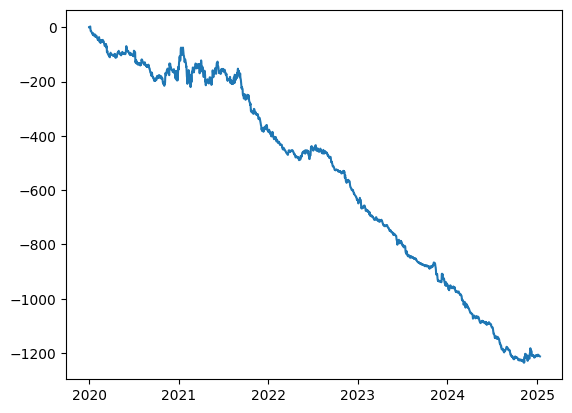

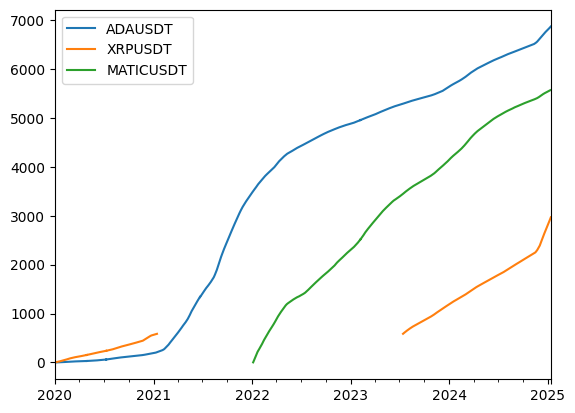

In [86]:
daily_volume_net_returns.cumsum().plot()
px_df.drop(columns=["BTCUSDT", "ETHUSDT","BNBUSDT","SOLUSDT","DOTUSDT"]).cumsum().plot()

Only trade coins with a change in volume above a certain threshold in absolute value.

## Strategy 5: Use Volume Traded Times Change In Price Over Interval As Signal

## Strategy 6: Pairs Trading For Cryptocurrencies (Reversal Strategy)

Observe the correlation between the different cryptocurrencies and try to apply pairs trading for highly correlated pairs.

In [87]:
px_df.corr()

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
BTCUSDT,1.000000,0.853984,0.494922,0.880870,0.736216,0.088522,-0.254158,0.839418
ETHUSDT,0.853984,1.000000,0.696661,0.918497,0.612497,0.514174,0.113725,0.864810
ADAUSDT,0.494922,0.696661,1.000000,0.536565,0.843037,0.896534,0.598519,0.396997
BNBUSDT,0.880870,0.918497,0.536565,1.000000,0.630102,0.227261,-0.139390,0.849858
XRPUSDT,0.736216,0.612497,0.843037,0.630102,1.000000,0.376848,-0.100425,0.535222
DOTUSDT,0.088522,0.514174,0.896534,0.227261,0.376848,1.000000,0.815793,0.330854
MATICUSDT,-0.254158,0.113725,0.598519,-0.139390,-0.100425,0.815793,1.000000,-0.128459
SOLUSDT,0.839418,0.864810,0.396997,0.849858,0.535222,0.330854,-0.128459,1.000000


There is a strong historical correlation between ETHUSDT and BNBUSDT of ~0.919. There are also fairly strong correlations between BTCUSDT and BNBUSDT

<Axes: >

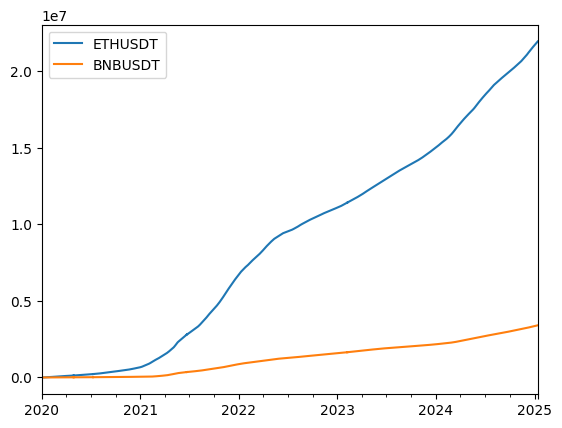

In [88]:
px_df[["ETHUSDT", "BNBUSDT"]].cumsum().plot()

In [89]:
import statsmodels.api as sm

X = px_df["BNBUSDT"]
X = sm.add_constant(X)
X

,const,BNBUSDT
2020-01-01 00:00:00,1.0,13.8159
2020-01-01 04:00:00,1.0,13.7648
2020-01-01 08:00:00,1.0,13.7162
2020-01-01 12:00:00,1.0,13.7958
2020-01-01 16:00:00,1.0,13.7270
...,...,...
2025-01-11 16:00:00,1.0,695.2500
2025-01-11 20:00:00,1.0,698.7600
2025-01-12 00:00:00,1.0,691.9900
2025-01-12 04:00:00,1.0,694.5300


In [90]:
Y = px_df["ETHUSDT"]
Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2025-01-11 16:00:00    3278.26
2025-01-11 20:00:00    3285.23
2025-01-12 00:00:00    3283.33
2025-01-12 04:00:00    3269.00
2025-01-12 08:00:00    3238.97
Freq: 4h, Name: ETHUSDT, Length: 11031, dtype: float64

In [91]:
drop_X = X[X["BNBUSDT"].isna()].index
drop_X

DatetimeIndex(['2020-04-28 04:00:00', '2020-04-28 08:00:00',
               '2020-07-09 04:00:00', '2020-07-09 08:00:00',
               '2021-06-22 04:00:00', '2023-02-06 08:00:00'],
              dtype='datetime64[ns]', freq=None)

In [92]:
X = X.drop(drop_X)
X

,const,BNBUSDT
2020-01-01 00:00:00,1.0,13.8159
2020-01-01 04:00:00,1.0,13.7648
2020-01-01 08:00:00,1.0,13.7162
2020-01-01 12:00:00,1.0,13.7958
2020-01-01 16:00:00,1.0,13.7270
...,...,...
2025-01-11 16:00:00,1.0,695.2500
2025-01-11 20:00:00,1.0,698.7600
2025-01-12 00:00:00,1.0,691.9900
2025-01-12 04:00:00,1.0,694.5300


In [93]:
X[X["BNBUSDT"].isna()]

,const,BNBUSDT


In [94]:
drop_Y = Y[Y.isna()].index
drop_Y

DatetimeIndex(['2020-04-28 04:00:00', '2020-04-28 08:00:00',
               '2020-07-09 04:00:00', '2020-07-09 08:00:00',
               '2021-06-22 04:00:00', '2023-02-06 08:00:00'],
              dtype='datetime64[ns]', freq=None)

In [95]:
Y = Y.drop(drop_Y)
Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2025-01-11 16:00:00    3278.26
2025-01-11 20:00:00    3285.23
2025-01-12 00:00:00    3283.33
2025-01-12 04:00:00    3269.00
2025-01-12 08:00:00    3238.97
Name: ETHUSDT, Length: 11025, dtype: float64

In [96]:
Y[Y.isna()]

Series([], Name: ETHUSDT, dtype: float64)

In [97]:
model_ols = sm.OLS(Y, X)
model_ols

In [98]:
results_ols = model_ols.fit()
results_ols.params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


const      341.359050
BNBUSDT      5.336373
dtype: float64

In [99]:
X["OLS Reg Model"] = X["BNBUSDT"] * results_ols.params["BNBUSDT"] + results_ols.params["const"]
X

,const,BNBUSDT,OLS Reg Model
2020-01-01 00:00:00,1.0,13.8159,415.085845
2020-01-01 04:00:00,1.0,13.7648,414.813156
2020-01-01 08:00:00,1.0,13.7162,414.553809
2020-01-01 12:00:00,1.0,13.7958,414.978584
2020-01-01 16:00:00,1.0,13.7270,414.611441
...,...,...,...
2025-01-11 16:00:00,1.0,695.2500,4051.472337
2025-01-11 20:00:00,1.0,698.7600,4070.203006
2025-01-12 00:00:00,1.0,691.9900,4034.075761
2025-01-12 04:00:00,1.0,694.5300,4047.630148


In [100]:
X["residuals"] = Y - X["OLS Reg Model"]
X["ETHUSDT"] = Y
X

,const,BNBUSDT,OLS Reg Model,residuals,ETHUSDT
2020-01-01 00:00:00,1.0,13.8159,415.085845,-284.905845,130.18
2020-01-01 04:00:00,1.0,13.7648,414.813156,-284.293156,130.52
2020-01-01 08:00:00,1.0,13.7162,414.553809,-283.713809,130.84
2020-01-01 12:00:00,1.0,13.7958,414.978584,-283.138584,131.84
2020-01-01 16:00:00,1.0,13.7270,414.611441,-282.631441,131.98
...,...,...,...,...,...
2025-01-11 16:00:00,1.0,695.2500,4051.472337,-773.212337,3278.26
2025-01-11 20:00:00,1.0,698.7600,4070.203006,-784.973006,3285.23
2025-01-12 00:00:00,1.0,691.9900,4034.075761,-750.745761,3283.33
2025-01-12 04:00:00,1.0,694.5300,4047.630148,-778.630148,3269.00


<Axes: >

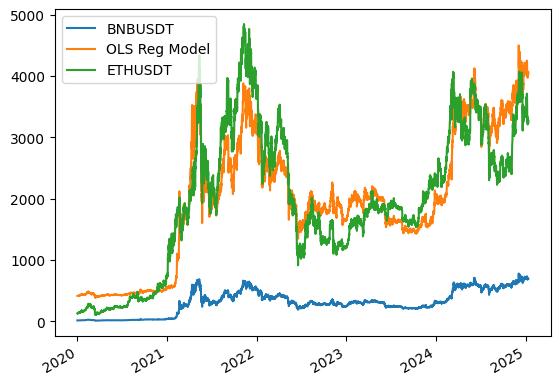

In [101]:
X[["BNBUSDT", "OLS Reg Model", "ETHUSDT"]].plot()

In [102]:
X[["OLS Reg Model"]].corrwith(X["ETHUSDT"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


OLS Reg Model    0.918497
dtype: float64

<Axes: >

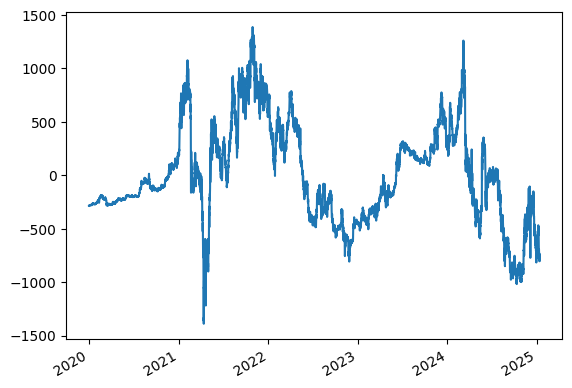

In [103]:
X["residuals"].plot()

In [104]:
early_X = X.iloc[:(X.shape[0] // 2)]
early_X

,const,BNBUSDT,OLS Reg Model,residuals,ETHUSDT
2020-01-01 00:00:00,1.0,13.8159,415.085845,-284.905845,130.18
2020-01-01 04:00:00,1.0,13.7648,414.813156,-284.293156,130.52
2020-01-01 08:00:00,1.0,13.7162,414.553809,-283.713809,130.84
2020-01-01 12:00:00,1.0,13.7958,414.978584,-283.138584,131.84
2020-01-01 16:00:00,1.0,13.7270,414.611441,-282.631441,131.98
...,...,...,...,...,...
2022-07-07 16:00:00,1.0,243.2851,1639.619074,-391.029074,1248.59
2022-07-07 20:00:00,1.0,241.6398,1630.839140,-393.979140,1236.86
2022-07-08 00:00:00,1.0,244.6786,1647.055310,-388.275310,1258.78
2022-07-08 04:00:00,1.0,240.6682,1625.654320,-384.684320,1240.97


In [105]:
early_Y = Y.iloc[:(Y.shape[0] // 2)]
early_Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2022-07-07 16:00:00    1248.59
2022-07-07 20:00:00    1236.86
2022-07-08 00:00:00    1258.78
2022-07-08 04:00:00    1240.97
2022-07-08 08:00:00    1219.10
Name: ETHUSDT, Length: 5512, dtype: float64

In [106]:
early_model_ols = sm.OLS(early_Y, early_X[["const", "BNBUSDT"]])
early_results_ols = early_model_ols.fit()
early_results_ols.params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


const      234.915424
BNBUSDT      6.444703
dtype: float64

### Try Using Z-Scores To Determine When To Take Positions

In [147]:
eth_bnb_df = px_df.loc[:pd.to_datetime("2022-12-31 20:00:00")][["ETHUSDT", "BNBUSDT"]]
eth_bnb_df

,ETHUSDT,BNBUSDT
2020-01-01 00:00:00,130.18,13.8159
2020-01-01 04:00:00,130.52,13.7648
2020-01-01 08:00:00,130.84,13.7162
2020-01-01 12:00:00,131.84,13.7958
2020-01-01 16:00:00,131.98,13.7270
...,...,...
2022-12-31 04:00:00,1197.04,245.5269
2022-12-31 08:00:00,1197.13,245.7466
2022-12-31 12:00:00,1202.01,247.0076
2022-12-31 16:00:00,1202.37,246.7732


In [148]:
eth_bnb_df['ETH rets'] = eth_bnb_df['ETHUSDT'] / eth_bnb_df['ETHUSDT'].shift() - 1
eth_bnb_df['ETH log rets'] = np.log(eth_bnb_df['ETHUSDT']) - np.log(eth_bnb_df['ETHUSDT']).shift()
eth_bnb_df['BNB rets'] = eth_bnb_df['BNBUSDT'] / eth_bnb_df['BNBUSDT'].shift() - 1
eth_bnb_df['BNB log rets'] = np.log(eth_bnb_df['BNBUSDT']) / np.log(eth_bnb_df['BNBUSDT'].shift())

eth_bnb_df['ETH 30-day avg price'] = eth_bnb_df['ETHUSDT'].rolling(window=30*6, min_periods=1).mean()
eth_bnb_df['ETH 30-day avg rets'] = eth_bnb_df['ETH rets'].rolling(window=30*6, min_periods=1).mean()
eth_bnb_df['ETH 30-day avg log rets'] = eth_bnb_df['ETH log rets'].rolling(window=30*6, min_periods=1).mean()

eth_bnb_df['BNB 30-day avg price'] = eth_bnb_df['BNBUSDT'].rolling(window=30*6, min_periods=1).mean()
eth_bnb_df['BNB 30-day avg rets'] = eth_bnb_df['BNB rets'].rolling(window=30*6, min_periods=1).mean()
eth_bnb_df['BNB 30-day avg log rets'] = eth_bnb_df['BNB log rets'].rolling(window=30*6, min_periods=1).mean()

eth_bnb_df.head()

,ETHUSDT,BNBUSDT,ETH rets,ETH log rets,BNB rets,BNB log rets,ETH 30-day avg price,ETH 30-day avg rets,ETH 30-day avg log rets,BNB 30-day avg price,BNB 30-day avg rets,BNB 30-day avg log rets
2020-01-01 00:00:00,130.18,13.8159,NaN,NaN,NaN,NaN,130.180000,NaN,NaN,13.815900,NaN,NaN
2020-01-01 04:00:00,130.52,13.7648,0.002612,0.002608,-0.003699,0.998589,130.350000,0.002612,0.002608,13.790350,-0.003699,0.998589
2020-01-01 08:00:00,130.84,13.7162,0.002452,0.002449,-0.003531,0.998651,130.513333,0.002532,0.002529,13.765633,-0.003615,0.998620
2020-01-01 12:00:00,131.84,13.7958,0.007643,0.007614,0.005803,1.002210,130.845000,0.004235,0.004224,13.773175,-0.000475,0.999817
2020-01-01 16:00:00,131.98,13.7270,0.001062,0.001061,-0.004987,0.998095,131.072000,0.003442,0.003433,13.763940,-0.001603,0.999386


In [149]:
### CHANGE THIS ORDER

columns = [('ETHUSDT', 'price'), ('BNBUSDT', 'price'), ('ETHUSDT', 'rets'), ('ETHUSDT', 'log rets'),
           ('BNBUSDT', 'rets'), ('BNBUSDT', 'log rets'), ('ETHUSDT', '30-day avg price'),
           ('ETHUSDT', '30-day avg rets'), ('ETHUSDT', '30-day avg log rets'), ('BNBUSDT', '30-day avg price'),
           ('BNBUSDT', '30-day avg rets'), ('BNBUSDT', '30-day avg log rets')
           
           #('ETHUSDT', 'log rets'), ('BNBUSDT', 'rets'), ('BNBUSDT', 'log rets'),
           #('ETHUSDT', '30-day avg log rets'), ('ETHUSDT', '30-day avg price'),
           #('BNBUSDT', '30-day avg price')
          ]
eth_bnb_df.columns = pd.MultiIndex.from_tuples(columns)
eth_bnb_df = eth_bnb_df.sort_index(level=0, axis=1)
eth_bnb_df

BNBUSDT                                   \
                    30-day avg log rets 30-day avg price 30-day avg rets   
2020-01-01 00:00:00                 NaN        13.815900             NaN   
2020-01-01 04:00:00            0.998589        13.790350       -0.003699   
2020-01-01 08:00:00            0.998620        13.765633       -0.003615   
2020-01-01 12:00:00            0.999817        13.773175       -0.000475   
2020-01-01 16:00:00            0.999386        13.763940       -0.001603   
...                                 ...              ...             ...   
2022-12-31 04:00:00            0.999810       264.290229       -0.001022   
2022-12-31 08:00:00            0.999802       263.985955       -0.001064   
2022-12-31 12:00:00            0.999836       263.737336       -0.000874   
2022-12-31 16:00:00            0.999836       263.488683       -0.000875   
2022-12-31 20:00:00            0.999831       263.231834       -0.000905   

                                                              ETHUSDT  \
                     log rets     price      rets 30-day avg log rets   
2020-01-01 00:00:00       NaN   13.8159       NaN                 NaN   
2020-01-01 04:00:00  0.998589   13.7648 -0.003699            0.002608   
2020-01-01 08:00:00  0.998651   13.7162 -0.003531            0.002529   
2020-01-01 12:00:00  1.002210   13.7958  0.005803            0.004224   
2020-01-01 16:00:00  0.998095   13.7270 -0.004987            0.003433   
...                       ...       ...       ...                 ...   
2022-12-31 04:00:00  1.000168  245.5269  0.000925           -0.000368   
2022-12-31 08:00:00  1.000163  245.7466  0.000895           -0.000382   
2022-12-31 12:00:00  1.000930  247.0076  0.005131           -0.000310   
2022-12-31 16:00:00  0.999828  246.7732 -0.000949           -0.000328   
2022-12-31 20:00:00  0.999478  246.0640 -0.002874           -0.000362   

                                                                         \
                    30-day avg price 30-day avg rets  log rets    price   
2020-01-01 00:00:00       130.180000             NaN       NaN   130.18   
2020-01-01 04:00:00       130.350000        0.002612  0.002608   130.52   
2020-01-01 08:00:00       130.513333        0.002532  0.002449   130.84   
2020-01-01 12:00:00       130.845000        0.004235  0.007614   131.84   
2020-01-01 16:00:00       131.072000        0.003442  0.001061   131.98   
...                              ...             ...       ...      ...   
2022-12-31 04:00:00      1237.776278       -0.000330  0.001881  1197.04   
2022-12-31 08:00:00      1237.302389       -0.000344  0.000075  1197.13   
2022-12-31 12:00:00      1236.919778       -0.000271  0.004068  1202.01   
2022-12-31 16:00:00      1236.513500       -0.000290  0.000299  1202.37   
2022-12-31 20:00:00      1236.066556       -0.000324 -0.005270  1196.05   

                               
                         rets  
2020-01-01 00:00:00       NaN  
2020-01-01 04:00:00  0.002612  
2020-01-01 08:00:00  0.002452  
2020-01-01 12:00:00  0.007643  
2020-01-01 16:00:00  0.001062  
...                       ...  
2022-12-31 04:00:00  0.001883  
2022-12-31 08:00:00  0.000075  
2022-12-31 12:00:00  0.004076  
2022-12-31 16:00:00  0.000299  
2022-12-31 20:00:00 -0.005256  

[6576 rows x 12 columns]

In [176]:
# Price regression

eth_bnb_price_df = eth_bnb_df[[("BNBUSDT", "30-day avg price"), ("ETHUSDT", "30-day avg price")]]
eth_bnb_price_df = sm.add_constant(eth_bnb_price_df)

eth_bnb_price_df

,const,"(BNBUSDT, 30-day avg price)","(ETHUSDT, 30-day avg price)"
2020-01-01 00:00:00,1.0,13.815900,130.180000
2020-01-01 04:00:00,1.0,13.790350,130.350000
2020-01-01 08:00:00,1.0,13.765633,130.513333
2020-01-01 12:00:00,1.0,13.773175,130.845000
2020-01-01 16:00:00,1.0,13.763940,131.072000
...,...,...,...
2022-12-31 04:00:00,1.0,264.290229,1237.776278
2022-12-31 08:00:00,1.0,263.985955,1237.302389
2022-12-31 12:00:00,1.0,263.737336,1236.919778
2022-12-31 16:00:00,1.0,263.488683,1236.513500


In [177]:
eth_bnb_price_model_ols = sm.OLS(eth_bnb_price_df[("ETHUSDT", "30-day avg price")],
                                 eth_bnb_price_df[["const", ("BNBUSDT", "30-day avg price")]])

eth_bnb_price_results_ols = eth_bnb_price_model_ols.fit()
eth_bnb_price_results_ols.params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


const                          149.722077
(BNBUSDT, 30-day avg price)      6.404385
dtype: float64

In [178]:
eth_bnb_price_df["ETHUSDT, model prediction"] = \
    eth_bnb_price_results_ols.params["const"] + \
    eth_bnb_price_results_ols.params[("BNBUSDT", "30-day avg price")] * eth_bnb_price_df[("BNBUSDT", "30-day avg price")]
# eth_bnb_price_results_ols.params["const"]
# eth_bnb_price_results_ols.params[("BNBUSDT", "30-day avg price")]

eth_bnb_price_df["model residuals"] = \
    eth_bnb_price_df[("ETHUSDT", "30-day avg price")] - eth_bnb_price_df["ETHUSDT, model prediction"]

In [180]:
eth_bnb_price_df

,const,"(BNBUSDT, 30-day avg price)","(ETHUSDT, 30-day avg price)","ETHUSDT, model prediction",model residuals
2020-01-01 00:00:00,1.0,13.815900,130.180000,238.204414,-108.024414
2020-01-01 04:00:00,1.0,13.790350,130.350000,238.040782,-107.690782
2020-01-01 08:00:00,1.0,13.765633,130.513333,237.882487,-107.369153
2020-01-01 12:00:00,1.0,13.773175,130.845000,237.930786,-107.085786
2020-01-01 16:00:00,1.0,13.763940,131.072000,237.871642,-106.799642
...,...,...,...,...,...
2022-12-31 04:00:00,1.0,264.290229,1237.776278,1842.338348,-604.562070
2022-12-31 08:00:00,1.0,263.985955,1237.302389,1840.389657,-603.087268
2022-12-31 12:00:00,1.0,263.737336,1236.919778,1838.797403,-601.877625
2022-12-31 16:00:00,1.0,263.488683,1236.513500,1837.204938,-600.691438


In [222]:
signal_df = px_df[["ETHUSDT", "BNBUSDT"]][:]
# signal_df = px_df[["ETHUSDT", "BNBUSDT"]].rolling(window=30*6, min_periods=1).mean()
# signal_df.columns = ["ETH, 30-day avg", "BNB, 30-day avg"]

signal_df["rolling cov"] = signal_df["BNBUSDT"].rolling(window=30*6, min_periods=1).cov(signal_df["ETHUSDT"])
signal_df["bnb rolling var"] = signal_df["BNBUSDT"].rolling(window=30*6, min_periods=1).var()
signal_df["beta"] = signal_df["rolling cov"] / signal_df["bnb rolling var"]
signal_df["alpha"] = signal_df["ETHUSDT"].rolling(window=30*6, min_periods=1).mean() - \
    signal_df["beta"] * signal_df["BNBUSDT"].rolling(window=30*6, min_periods=1).mean()

# signal_df["ETH 30-day avg, est"] = \
#     signal_df["BNB, 30-day avg"] * eth_bnb_price_results_ols.params[("BNBUSDT", "30-day avg price")] + \
#     eth_bnb_price_results_ols.params["const"]
# signal_df["ETH residual"] = signal_df["ETH, 30-day avg"] - signal_df["ETH 30-day avg, est"]
# signal_df["ETH residual, mu"] = signal_df["ETH residual"].rolling(window=30*6, min_periods=1).mean()
# signal_df["ETH residual, sigma"] = signal_df["ETH residual"].rolling(window=30*6, min_periods=1).std()
# signal_df["z-score"] = (signal_df["ETH residual"] - signal_df["ETH residual, mu"]) / \
#     signal_df["ETH residual, sigma"]

signal_df["residual"] = signal_df["ETHUSDT"] - (signal_df["BNBUSDT"] * signal_df["beta"] + signal_df["alpha"])

residual_mean = signal_df["residual"].mean()
residual_std = signal_df["residual"].std()
signal_df["z-score"] = (signal_df["residual"] - residual_mean) / residual_std

signal_df

,ETHUSDT,BNBUSDT,rolling cov,bnb rolling var,beta,alpha,residual,z-score
2020-01-01 00:00:00,130.18,13.8159,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,130.52,13.7648,-0.008687,0.001306,-6.653620,222.105753,-1.799094e-11,0.064891
2020-01-01 08:00:00,130.84,13.7162,-0.016455,0.002486,-6.620149,221.643874,-5.893547e-04,0.064887
2020-01-01 12:00:00,131.84,13.7958,-0.000965,0.001885,-0.511797,137.894071,1.006579e+00,0.071596
2020-01-01 16:00:00,131.98,13.7270,-0.011205,0.001840,-6.090298,214.898490,6.830244e-01,0.069441
...,...,...,...,...,...,...,...,...
2025-01-11 16:00:00,3278.26,695.2500,2615.179341,329.485427,7.937162,-2030.937072,-2.091151e+02,-1.327967
2025-01-11 20:00:00,3285.23,698.7600,2603.625634,329.266812,7.907343,-2013.074045,-2.270310e+02,-1.447300
2025-01-12 00:00:00,3283.33,691.9900,2592.975227,329.148168,7.877836,-1995.307880,-1.727457e+02,-1.085721
2025-01-12 04:00:00,3269.00,694.5300,2595.084679,329.259899,7.881569,-2001.021798,-2.039645e+02,-1.293660


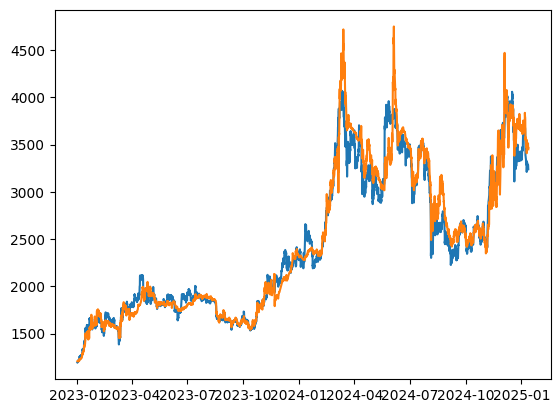

In [229]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(signal_df["ETHUSDT"].loc[pd.to_datetime("2023-01-01 00:00:00"):])
ax.plot((signal_df["BNBUSDT"] * signal_df["beta"] + signal_df["alpha"]).loc[pd.to_datetime("2023-01-01 00:00:00"):])
plt.show()

## Strategy 7: Use XGBoost On Price Data And Volume Data

Fit a model with features taken using price data and volume data. Consider using principal component analysis.

## Strategy 8: Seasonality Across The Week

Look for seasonal patterns during the period of a week. Maybe there is similar activity consistently during:

  - weekdays versus during weekends
  - morning versus night
  - Fridays
 
Over longer intervals:

  - first day of the month

In [171]:
np.random.seed(751)

print(1 / (102**2))

def get_min_diff(num_trials):
    total_min_diff = 0.0

    for _ in range(num_trials):
        rvs = np.random.uniform(size=101)
        rvs.sort()
        min_diff = rvs[0]
        min_diff = min(min_diff, 1 - rvs[-1])
        for index in range(len(rvs)-1):
            min_diff = min(min_diff, rvs[index+1]-rvs[index])
        total_min_diff += min_diff

    return total_min_diff / num_trials

for num_trials in [10**x for x in range(1, 7)]:
    print(f"{num_trials} trials, {get_min_diff(num_trials)}")

9.611687812379854e-05
10 trials, 6.279533187603104e-05
100 trials, 9.473426811017816e-05
1000 trials, 9.84895187032453e-05
10000 trials, 9.705341325120361e-05
100000 trials, 9.653166879815221e-05
1000000 trials, 9.617215952395997e-05
